# Illustration of not using preprocessing on MNIST

Load the MNIST data.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

Using TensorFlow backend.


Rather than the preprocessing used in other notebooks, we won't transform input values to be between 0 and 1.

In [2]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")
val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype("float32")
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
hist_MNIST = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                       validation_data=(val_images, val_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 182us/step - loss: 6.5955 - acc: 0.5855 - val_loss: 5.5524 - val_acc: 0.6523
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 5.6363 - acc: 0.6479 - val_loss: 5.5691 - val_acc: 0.6519
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 5.5568 - acc: 0.6536 - val_loss: 5.3198 - val_acc: 0.6686
Epoch 4/10
60000/60000 [==============================] - 15s 243us/step - loss: 4.9398 - acc: 0.6912 - val_loss: 4.5278 - val_acc: 0.7172
Epoch 5/10
60000/60000 [==============================] - 14s 232us/step - loss: 4.3511 - acc: 0.7283 - val_loss: 4.2380 - val_acc: 0.7359
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 4.3889 - acc: 0.7265 - val_loss: 4.2938 - val_acc: 0.7325
Epoch 7/10
60000/60000 [==============================] - 13s 215us/step - loss: 4.2386 - acc: 0.7361 - val_loss: 4.1

In [5]:
import matplotlib.pyplot as plt

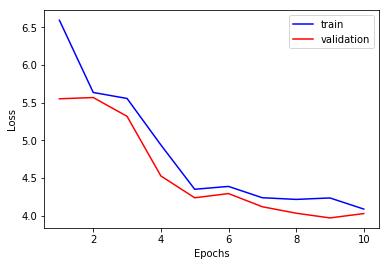

In [6]:
history_dict = hist_MNIST.history
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "b-", label="train")
plt.plot(epochs, val_loss, "r-", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

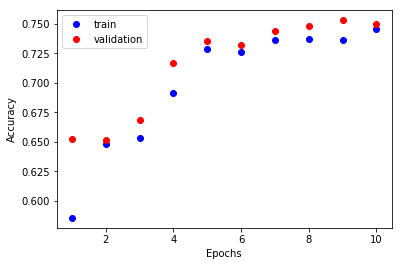

In [7]:
train_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, train_acc, "bo", label="train")
plt.plot(epochs, val_acc, "ro", label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

After 10 epochs, our loss and accuracy are still not as good as after a single epoch with normalised data! (see Figure 6.3 in the notes).

Note that these results are highly variable - on rerunning the notebook I sometimes got much better or worse results. This illustrate that lack of normalisation makes training highly sensitive to the random choice of initial weights.